

<hr style="margin-bottom: 40px;">

# AMDT - Backtesting

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## (A) (B) Simplified

In [1]:
import pandas as pd
import numpy as np
from datetime import date
from matplotlib import pyplot as plt

df = pd.read_excel("AMTD.xlsx", parse_dates=True, index_col="date")
df.apply(pd.to_numeric, errors='ignore')
df = df.rename(columns=lambda x: x.strip())
df = df.dropna(axis="index",how="all") #drop NaN values. The earliest data starts from 2010-4-5.
#df = df.drop(["AMRSGRF HK Equity", "AMINAGP HK Equity", "AMINCAA HK Equity"],axis=1)
hsi = pd.read_csv("HSI.csv", parse_dates=True, index_col="Date")
hsi = hsi.dropna(axis="index",how="all")
hsi = hsi[(hsi.index > pd.Timestamp(date(2010,4,5)))].astype(float)

Text(0.5, 1.0, 'Performance of HSI')

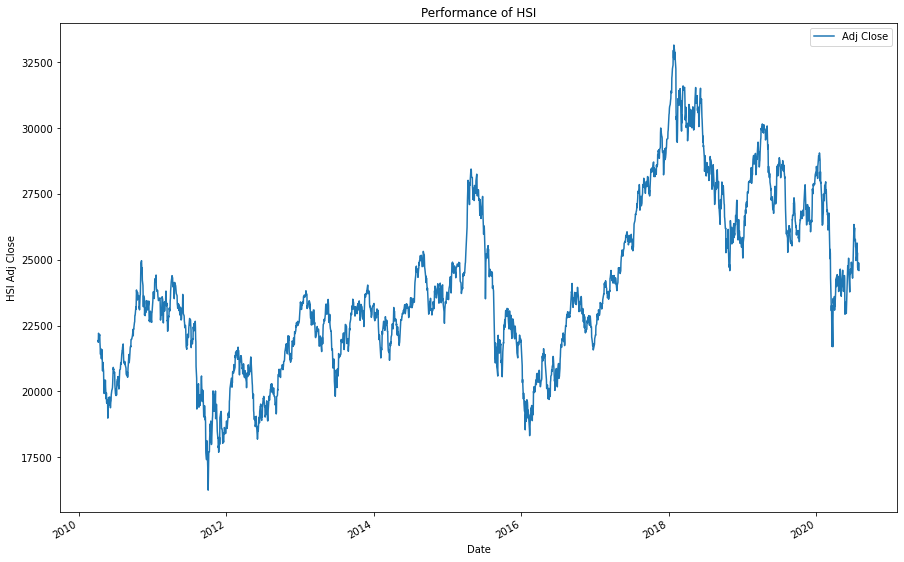

In [2]:
hsi.plot(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('HSI Adj Close')
plt.title("Performance of HSI")

Text(0.5, 1.0, 'Performance of AMTD Funds before Rebalancing Portfolio')

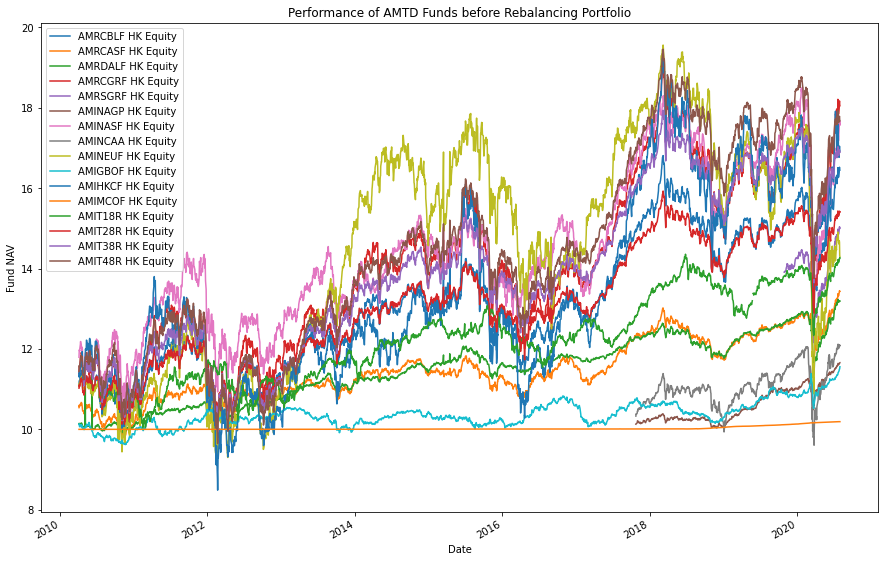

In [3]:
df.plot(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Fund NAV')
plt.title("Performance of AMTD Funds before Rebalancing Portfolio")

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Define Backtesting Function



In [21]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.expected_returns import mean_historical_return

weights_list = []

x = [date(2019,11,1), date(2019,12,1),date(2020,1,1),date(2020,2,1),date(2020,3,1),date(2020,4,1),date(2020,5,1),date(2020,6,1),date(2020,7,1)]

for i in x:      
    reb_mo = pd.Timestamp(reb_mo)
    print("---------------------------------Rebalancing Portfolio on " + str(reb_mo) + "---------------------------------")
    end_date = reb_mo + pd.to_timedelta(np.ceil(duration), unit="D")
    train_set = df[(df.index < reb_mo)]
    test_set = df[(df.index >= reb_mo) & (df.index < end_date)]
    hsi_set = hsi[(hsi.index >= reb_mo) & (hsi.index < end_date)]
    S = CovarianceShrinkage(train_set).ledoit_wolf()
    mu = mean_historical_return(train_set)
    test_mu = mean_historical_return(test_set)
    
    if functionname == "1a":
        ef = EfficientFrontier(mu, S)
        ef.max_sharpe()
        weights = ef.clean_weights() 
    
    elif functionname == "1b":
        ef = EfficientFrontier(None, S, weight_bounds=(None, None))
        ef.min_volatility()
        weights = ef.clean_weights()
    
    elif functionname == "2a":
        ef = EfficientFrontier(mu, S)
        ef.efficient_risk(target_volatility=0.05)                    
        weights = ef.clean_weights()
        
    elif functionname == "2b":
        ef = EfficientFrontier(mu, S)
        ef.efficient_return(target_return=0.05, market_neutral=True)
        weights = ef.clean_weights()
    
    print("----------Train Set Performance ---------------")
    ret,vol,sharpe = ef.portfolio_performance(verbose=True)
    print("----------Actual Performance ---------------")
    ret_data = test_set.pct_change()[1:] #each fund return (regardless of bought or not)(daily)
    weighted_returns = (weights * ret_data) #separate columns - each fund weighted return (daily)
    port_ret = weighted_returns.sum(axis=1) #1 column, many days - portfolio return (daily) (adding up columns of each fund weighted returns)
    period_port_return = sum(port_ret) #one num - adding up rows (days)(daily port return data)
    #avg_daily_port_return = period_port_return/len(ret_data) #average daily portfolio return
    #ann_port_return = avg_daily_port_return*252
    print("Portfolio return in test year: " + str(period_port_return*100) + " %")

    try:
        diff = (period_port_return - ret)*100
        print("Portfolio return compared to train set: " + str(diff) + " %")
        
    except:
      print("")

    port_vol = port_ret.std(ddof=0)
    print("Portfolio Volatility: " + str(port_vol*100) + " %")

    print("----------Comparison with Benchmark---------------")
    ret_bench = hsi_set.pct_change()[1:] #hsi daily return
    period_bench_return = ret_bench.sum() #adding up rows (days)
    #avg_daily_bench_return = period_bench_return/len(ret_bench) #average daily portfolio return
    #ann_bench_return = avg_daily_bench_return*252
    print("Benchmark return in test year: " + str(period_bench_return*100) + " %")

    
    diff = (period_port_return - period_bench_return)*100
    print("Portfolio annualized return compared to benchmark: " + str(diff) + " %")
   
    print("----------Portfolio Weighting---------------")
    print("Porfolio weightings:" + str(weights))
    weights = pd.Series(weights)
    weights_list.append(weights)

---------------------------------Rebalancing Portfolio on 2020-08-01 00:00:00---------------------------------
----------Train Set Performance ---------------
Expected annual return: 9.9%
Annual volatility: 3.1%
Sharpe Ratio: 2.57
----------Actual Performance ---------------
Portfolio return in test year: 0 %
Portfolio return compared to train set: -9.863670549072502 %
Portfolio Volatility: nan %
----------Comparison with Benchmark---------------
Benchmark return in test year: Adj Close    0.0
dtype: float64 %
Portfolio annualized return compared to benchmark: Adj Close    0.0
dtype: float64 %
----------Portfolio Weighting---------------
Porfolio weightings:OrderedDict([('AMRCBLF HK Equity', 0.0), ('AMRCASF HK Equity', 0.0), ('AMRDALF HK Equity', 0.0), ('AMRCGRF HK Equity', 0.0), ('AMRSGRF HK Equity', 0.85372), ('AMINAGP HK Equity', 0.14628), ('AMINASF HK Equity', 0.0), ('AMINCAA HK Equity', 0.0), ('AMINEUF HK Equity', 0.0), ('AMIGBOF HK Equity', 0.0), ('AMIHKCF HK Equity', 0.0), ('AMI

In [22]:
weights_list

[AMRCBLF HK Equity    0.00000
 AMRCASF HK Equity    0.00000
 AMRDALF HK Equity    0.00000
 AMRCGRF HK Equity    0.00000
 AMRSGRF HK Equity    0.85372
 AMINAGP HK Equity    0.14628
 AMINASF HK Equity    0.00000
 AMINCAA HK Equity    0.00000
 AMINEUF HK Equity    0.00000
 AMIGBOF HK Equity    0.00000
 AMIHKCF HK Equity    0.00000
 AMIMCOF HK Equity    0.00000
 AMIT18R HK Equity    0.00000
 AMIT28R HK Equity    0.00000
 AMIT38R HK Equity    0.00000
 AMIT48R HK Equity    0.00000
 dtype: float64,
 AMRCBLF HK Equity    0.00000
 AMRCASF HK Equity    0.00000
 AMRDALF HK Equity    0.00000
 AMRCGRF HK Equity    0.00000
 AMRSGRF HK Equity    0.85372
 AMINAGP HK Equity    0.14628
 AMINASF HK Equity    0.00000
 AMINCAA HK Equity    0.00000
 AMINEUF HK Equity    0.00000
 AMIGBOF HK Equity    0.00000
 AMIHKCF HK Equity    0.00000
 AMIMCOF HK Equity    0.00000
 AMIT18R HK Equity    0.00000
 AMIT28R HK Equity    0.00000
 AMIT38R HK Equity    0.00000
 AMIT48R HK Equity    0.00000
 dtype: float64,
 AMRCB

In [16]:
#for making composition graphs

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.expected_returns import mean_historical_return

functionname = "1a"
reb_mo = date(2020,8,1)
duration = 365

reb_mo = pd.Timestamp(reb_mo)
print("---------------------------------Rebalancing Portfolio on " + str(reb_mo) + "---------------------------------")
end_date = reb_mo + pd.to_timedelta(np.ceil(duration), unit="D")
train_set = df[(df.index < reb_mo)]
test_set = df[(df.index >= reb_mo) & (df.index < end_date)]
hsi_set = hsi[(hsi.index >= reb_mo) & (hsi.index < end_date)]
S = CovarianceShrinkage(train_set).ledoit_wolf()
mu = mean_historical_return(train_set)
test_mu = mean_historical_return(test_set)

if functionname == "1a":
    ef = EfficientFrontier(mu, S)
    ef.max_sharpe()
    weights = ef.clean_weights() 
elif functionname == "1b":
    ef = EfficientFrontier(None, S, weight_bounds=(None, None))
    ef.min_volatility()
    weights = ef.clean_weights()

elif functionname == "2a":
    ef = EfficientFrontier(mu, S)
    ef.efficient_risk(target_volatility=0.05)                    
    weights = ef.clean_weights()
     
elif functionname == "2b":
    ef = EfficientFrontier(mu, S)
    ef.efficient_return(target_return=0.05, market_neutral=True)
    weights = ef.clean_weights()
    
print("----------Train Set Performance ---------------")
ret,vol,sharpe = ef.portfolio_performance(verbose=True)
print("----------Actual Performance ---------------")
ret_data = test_set.pct_change()[1:] #each fund return (regardless of bought or not)(daily)
weighted_returns = (weights * ret_data) #separate columns - each fund weighted return (daily)
port_ret = weighted_returns.sum(axis=1) #1 column, many days - portfolio return (daily) (adding up columns of each fund weighted returns)
period_port_return = sum(port_ret) #one num - adding up rows (days)(daily port return data)
#avg_daily_port_return = period_port_return/len(ret_data) #average daily portfolio return
#ann_port_return = avg_daily_port_return*252
print("Portfolio return in test year: " + str(period_port_return*100) + " %")
try:
    diff = (period_port_return - ret)*100
    print("Portfolio return compared to train set: " + str(diff) + " %")
        
except:
    print("")

port_vol = port_ret.std(ddof=0)
print("Portfolio Volatility: " + str(port_vol*100) + " %")
print("----------Comparison with Benchmark---------------")
ret_bench = hsi_set.pct_change()[1:] #hsi daily return
period_bench_return = ret_bench.sum() #adding up rows (days)
#avg_daily_bench_return = period_bench_return/len(ret_bench) #average daily portfolio return
#ann_bench_return = avg_daily_bench_return*252
print("Benchmark return in test year: " + str(period_bench_return*100) + " %")
    
diff = (period_port_return - period_bench_return)*100
print("Portfolio annualized return compared to benchmark: " + str(diff) + " %")
  
print("----------Portfolio Weighting---------------")
print("Porfolio weightings:" + str(weights))



---------------------------------Rebalancing Portfolio on 2020-08-01 00:00:00---------------------------------
----------Train Set Performance ---------------
Expected annual return: 9.9%
Annual volatility: 3.1%
Sharpe Ratio: 2.57
----------Actual Performance ---------------
Portfolio return in test year: 0 %
Portfolio return compared to train set: -9.863670549072502 %
Portfolio Volatility: nan %
----------Comparison with Benchmark---------------
Benchmark return in test year: Adj Close    0.0
dtype: float64 %
Portfolio annualized return compared to benchmark: Adj Close    0.0
dtype: float64 %
----------Portfolio Weighting---------------
Porfolio weightings:OrderedDict([('AMRCBLF HK Equity', 0.0), ('AMRCASF HK Equity', 0.0), ('AMRDALF HK Equity', 0.0), ('AMRCGRF HK Equity', 0.0), ('AMRSGRF HK Equity', 0.85372), ('AMINAGP HK Equity', 0.14628), ('AMINASF HK Equity', 0.0), ('AMINCAA HK Equity', 0.0), ('AMINEUF HK Equity', 0.0), ('AMIGBOF HK Equity', 0.0), ('AMIHKCF HK Equity', 0.0), ('AMI

In [8]:
weights

OrderedDict([('AMRCBLF HK Equity', 0.0),
             ('AMRCASF HK Equity', 0.0),
             ('AMRDALF HK Equity', 0.0),
             ('AMRCGRF HK Equity', 0.0),
             ('AMRSGRF HK Equity', 0.85372),
             ('AMINAGP HK Equity', 0.14628),
             ('AMINASF HK Equity', 0.0),
             ('AMINCAA HK Equity', 0.0),
             ('AMINEUF HK Equity', 0.0),
             ('AMIGBOF HK Equity', 0.0),
             ('AMIHKCF HK Equity', 0.0),
             ('AMIMCOF HK Equity', 0.0),
             ('AMIT18R HK Equity', 0.0),
             ('AMIT28R HK Equity', 0.0),
             ('AMIT38R HK Equity', 0.0),
             ('AMIT48R HK Equity', 0.0)])


## 1st five-year Backtesting (for Function 1a)
### Run the function - what's the weighting for this period?

In [5]:
reb_mo1 = date(2020,8,1)
duration = 365
backtesting("2a", reb_mo1, duration)

---------------------------------Rebalancing Portfolio on 2020-08-01 00:00:00---------------------------------


In [ ]:
reb_mo1 = date(2018,11,1)
reb_mo2 = date(2018,12,1)
reb_mo3 = date(2019,1,1)
reb_mo4 = date(2019,2,1)
reb_mo5 = date(2019,3,1)
reb_mo6 = date(2019,4,1)
reb_mo7 = date(2019,5,1)
reb_mo8 = date(2019,6,1)
reb_mo9 = date(2019,7,1)
reb_mo10 = date(2019,8,1)
reb_mo11 = date(2019,9,1)

duration = 30

backtesting("2b", reb_mo1, duration)

backtesting("1a", reb_mo2, duration)

backtesting("1a", reb_mo3, duration)

backtesting("1a", reb_mo4, duration)

backtesting("1a", reb_mo5, duration)

backtesting("1a", reb_mo6, duration)

backtesting("1a", reb_mo7, duration)

backtesting("1a", reb_mo8, duration)

backtesting("1a", reb_mo9, duration)

backtesting("1a", reb_mo10, duration)

backtesting("1a", reb_mo11, duration)

In [ ]:

#pd.Series(cleanweight1a).plot.pie(figsize=(5,5))
#mu.plot.barh(figsize=(10,6)) 
#test_mu.plot.barh(figsize=(10,6))

#plotting.plot_covariance(S, plot_correlation=True)
#mu.plot.barh(figsize=(10,6))

plt.style.use('fivethirtyeight')
df[(df.index < reb_mo)].plot(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Fund NAV')
plt.title("Performance of AMTD Funds before Rebalancing Portfolio")

df[(df.index >= reb_mo)].plot(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Fund NAV')
plt.title("Performance of AMTD Funds after Rebalancing Portfolio")

In [ ]:
#pd.Series(cleanweight1a).plot.pie(figsize=(5,5))
#mu.plot.barh(figsize=(10,6)) 
#test_mu.plot.barh(figsize=(10,6))

#plotting.plot_covariance(S, plot_correlation=True)
#mu.plot.barh(figsize=(10,6))

In [ ]:
#perch_all = [perch1,perch2,perch3,perch4,perch5,perch6]
#mean_perch = sum(perch_all) / len(perch_all)
#print( "Function 1a Average error (%): " + str(mean_perch))
#print( "Function 1a Accuracy (%): " + str(100-mean_perch))

In [ ]:
# finding out parameters for backtesting - best duration

from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show


reb_mo = date(2011,8,1)
#reb_mo = arange(pd.date_range(start="2010-11-1",end="2020-01-01"))
duration = arange(1,365,1)
 
X,Y = meshgrid(reb_mo, duration) # grid of point
Z = backtesting("1a", X, Y)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

In [ ]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.expected_returns import mean_historical_return

reb_mo = date(2019,11,1)
duration = 365
functionname = "2a"
    
reb_mo = pd.Timestamp(reb_mo)
print("---------------------------------Rebalancing Portfolio on " + str(reb_mo) + "---------------------------------")
end_date = reb_mo + pd.to_timedelta(np.ceil(duration), unit="D")
train_set = df[(df.index < reb_mo)]
test_set = df[(df.index >= reb_mo) & (df.index < end_date)]
hsi_set = hsi[(hsi.index >= reb_mo) & (hsi.index < end_date)]
S = CovarianceShrinkage(train_set).ledoit_wolf()
mu = mean_historical_return(train_set)
test_mu = mean_historical_return(test_set)
    
if functionname == "1a":
    ef = EfficientFrontier(mu, S)
    ef.max_sharpe()
    weights = ef.clean_weights() 
    
elif functionname == "1b":
    ef = EfficientFrontier(None, S, weight_bounds=(None, None))
    ef.min_volatility()
    weights = ef.clean_weights()
    
elif functionname == "2a":
    ef.efficient_risk(target_volatility=0.05)                    
    weights = ef.clean_weights()
        
elif functionname == "2b":
    ef.efficient_return(target_return=0.05, market_neutral=True)
    weights = ef.clean_weights()
        
print("----------Train Set Performance ---------------")
ret,vol,sharpe = ef.portfolio_performance(verbose=True)

ret_data = train_set.pct_change()[1:] #each fund return (regardless of bought or not)(daily)
weighted_returns = (weights * ret_data) #separate columns - each fund weighted return (daily)
port_ret = weighted_returns.sum(axis=1) #1 column, many days - portfolio return (daily) (adding up columns of each fund weighted returns)
period_port_return = sum(port_ret) #one num - adding up rows (days)(daily port return data)
avg_daily_port_return = period_port_return/len(ret_data) #average daily portfolio return
ann_port_return = avg_daily_port_return*252
print("Portfolio return in tain year: " + str(ann_port_return*100) + " %")

try:
    diff = (sum(port_ret) - ret)*100
    print("Portfolio return compared to train set: " + str(diff) + " %")
    perch = diff/ret
    print("Percentage change compared to train set: " + str(perch) + " %")
except:
  print("")

port_vol = port_ret.std(ddof=0)
print("Portfolio Volatility: " + str(port_vol*100) + " %")


print("----------Actual Performance ---------------")
ret_data = test_set.pct_change()[1:] #each fund return (regardless of bought or not)(daily)
weighted_returns = (weights * ret_data) #separate columns - each fund weighted return (daily)
port_ret = weighted_returns.sum(axis=1) #1 column, many days - portfolio return (daily) (adding up columns of each fund weighted returns)
period_port_return = sum(port_ret) #one num - adding up rows (days)(daily port return data)
avg_daily_port_return = period_port_return/len(ret_data) #average daily portfolio return
ann_port_return = avg_daily_port_return*252
print("Portfolio return in test year: " + str(ann_port_return*100) + " %")

try:
    diff = (sum(port_ret) - ret)*100
    print("Portfolio return compared to train set: " + str(diff) + " %")
    perch = diff/ret
    print("Percentage change compared to train set: " + str(perch) + " %")
except:
  print("")

port_vol = port_ret.std(ddof=0)
print("Portfolio Volatility: " + str(port_vol*100) + " %")

print("----------Comparison with Benchmark---------------")
ret_bench = hsi_set.pct_change()[1:] #hsi daily return
period_bench_return = ret_bench.sum() #adding up rows (days)
avg_daily_bench_return = period_bench_return/len(ret_bench) #average daily portfolio return
ann_bench_return = avg_daily_bench_return*252
print("Benchmark return in test year: " + str(ann_bench_return*100) + " %")

    
diff = (ann_port_return - ann_bench_return)*100
print("Portfolio annualized return compared to benchmark: " + str(diff) + " %")
diff2 = (period_port_return - period_bench_return)*100
print("Portfolio period return compared to benchmark: " + str(diff2) + " %")
    
print("----------Portfolio Weighting---------------")
print("Porfolio weightings:" + str(weights))

In [ ]:
compare = pd.read_excel("Book1.xlsx", parse_dates=True, index_col="Date")

In [ ]:
compare.plot(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('HSI Adj Close')
plt.title("Comparison between Porfolio and HSI Performance")